# Ejercicios de pandas
## David Gabriel
## 16/01/2020

***

In [2]:
import pandas as pd
import numpy as np

## Ejercicio 1

1. Generar arreglos de numpy para obtener el resultado de $ z = f(x,y) $ para un conjunto de entrada aleatorio de al menos 100 filas.

- Crear un `DataFrame` de pandas con las columnas $x$, $y$ y $z$.
- Obtener el promedio de cada `Series` en el `DataFrame`.

In [148]:
#1
x,y = np.random.random(100),np.random.random(100)
z = 2*x+3*y
#2
df = pd.DataFrame({'x':x,'y':y,'z':z})
#3
df.mean()

x    0.484678
y    0.474768
z    2.393660
dtype: float64

## Ejercicio 1.1

De forma similar al ejercicio anterior, genere un `DataFrame` con los resultados de una función $y = f(x)$ con al menos 100 filas. 

- Grafique los resultados con `matplotlib` utilizando 2 variantes:

    - a. Utilizando los arreglos de numpy (objetos `ndarray`) que utilizó para generar el `DataFrame`.
    - b. Utilizando los objetos `Series` del `DataFrame`.
    
- Obtenga el objeto *handler* de la gráfica y guarde la gráfica en PDF.

- Asegúrese de entender la diferencia entre generar la gráfica para guardarla (sin mostrarla) y generar la gráfica para mostrarla.

In [149]:
x = np.random.random(100)
y = 5*x**2+0.5
df = pd.DataFrame({'x':x,'y':y})

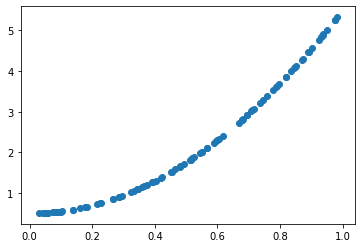

In [150]:
#1
#a
import matplotlib.pyplot as plt
plt.scatter(x,y)


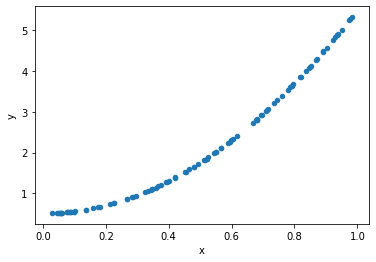

In [151]:
#b
df.plot.scatter(x='x',y='y')

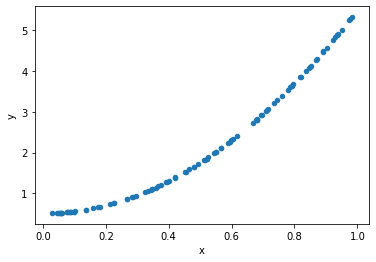

In [152]:
#c
h = df.plot.scatter(x='x',y='y')

In [154]:
#2
h.figure.savefig('figura.pdf')

## Ejercicio 2

1. Prueba 5 funciones de la primera página del *cheat sheet* no vistas en la exposición.

In [64]:
x1 = np.random.randint(6,size=3)
x2 = np.random.randint(2,size=3)
letra1 = ['a','b','c']
letra2 = ['d','e','f']

In [70]:
df1 = pd.DataFrame({'letra':letra1,'x':x1})
df2 = pd.DataFrame({'letra':letra2,'x':x2})
#1
df3 = pd.melt(df1)
df3

,variable,value
0,letra,a
1,letra,b
2,letra,c
3,x,3
4,x,3
5,x,2


In [69]:
#2
pd.concat([df1,df2])

,letra,x
0,a,3
1,b,3
2,c,2
0,d,0
1,e,0
2,f,1


In [72]:
#3
df3.pivot(columns='variable',values='value')

variable,letra,x
0,a,NaN
1,b,NaN
2,c,NaN
3,NaN,3
4,NaN,3
5,NaN,2


In [74]:
#4
df1.drop(columns=['letra'])

,x
0,3
1,3
2,2


In [77]:
#5
df1.rename(columns={'x':'y'})

,letra,y
0,a,3
1,b,3
2,c,2


## Ejercicio 3

Resuelva las siguientes preguntas utilizando las funciones de pandas. Ayúdese con la hoja de trucos.

In [3]:
df = pd.read_csv("data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - ¿Cuál es la tarifa máxima que se pagó? ¿Y la mediana?

In [110]:
df['Fare'].max(),df['Fare'].median()

(512.3292, 14.4542)

- Calcule la tasa de supervivencia promedio para todos los pasajeros (nota: la columna `Survived` indica si alguien sobrevivió (1) o no (0)).

In [111]:
df['Survived'].mean()

0.3838383838383838

- Haga una gráfica de la distribución de edades de los pasajeros del Titanic

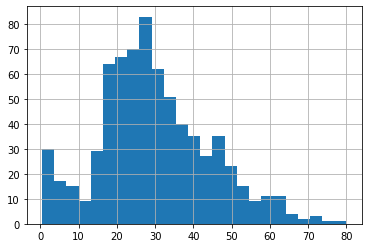

In [112]:
df['Age'].hist(bins=25)

- Según el conjunto de datos del Titanic, seleccione todas las filas para pasajeros masculinos y calcule la edad media de esos pasajeros. Haz lo mismo para las pasajeras.

In [113]:
df['Age'][df['Sex']=='male'].mean()

30.72664459161148

In [114]:
df['Age'][df['Sex']=='female'].mean()

27.915708812260537

- Según el conjunto de datos del Titanic, ¿cuántos pasajeros mayores de 70 estaban en el Titanic?

In [118]:
len(df['Age'][df['Age']>70])

5

- Calcula la edad promedio para cada sexo. Ahora utiliza el método `groupby`.

In [6]:
df.groupby(by='Sex').mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

- Calcule esta relación de supervivencia para todos los pasajeros menores de 25 años (recuerde: filtrado / indexación booleana).

In [131]:
df['Survived'][df['Age']<25].mean()

0.4244604316546763

- ¿Cuál es la diferencia en la proporción de supervivencia entre sexos?

In [9]:
r=df.groupby(by='Sex').mean()['Survived']
r['female']-r['male']

0.5531300709799203

- ¿O cómo difiere la proporción de sobrevivientes entre las diferentes clases de pasajeros? Haz una gráfica de barras visualizando la relación de supervivencia para las 3 clases.

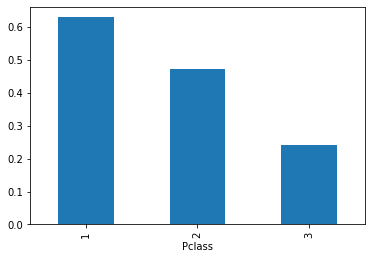

In [128]:
df.groupby(by='Pclass').mean()['Survived'].plot(kind='bar')

- Haga una gráfica de barras para visualizar la tarifa promedio pagada por los pasajeros de acuerdo a su edad. Para esto:
    - Primero, separamos a los pasajeros por rango, utilizando la función `pd.cut` y agregamos esta serie al DataFrame.
    - Debemos agrupar por esta columna y calcular el promedio de las tarifas.
    - Por último, agregamos `plot(kind='bar')` para obtener la gráfica de barras.

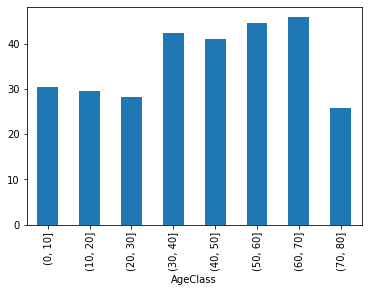

In [144]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))
df.groupby(by='AgeClass').mean()['Fare'].plot(kind='bar')